In [1]:
# con_contact
# Authors: Christian Haack, Stephan Meighen-Berger
# Example of how to check the effects of contact tracing

In [2]:
# General imports
import numpy as np
import matplotlib.pyplot as plt
import sys

In [3]:
# Adding path to module
sys.path.append("../")
# picture path
PICS = '../pics/'

In [4]:
# Module imports
from contagion import Contagion, config

In [5]:
# The fractions of interest
tracking_fractions = [0., 0.2, 0.4, 0.6]
# Some options
config["debug_level"] = 0
config["population size"] = 10000
config["average social circle"] = 5
config["infected"] = 10
infections = []
infectious = []
susceptible = []
for tracked_fraction in tracking_fractions:
    # Setting additional stuff
    config['measures'] = 'contact tracing'
    config['tracked'] = tracked_fraction
    # Creating a fourth_day object
    contagion = Contagion()
    # Running the simulations
    contagion.sim()
    # Storing results
    infections.append(contagion.statistics['infections'])
    infectious.append(contagion.statistics['infectious'])

In [6]:
# Plotting standards
std_size = 10.
fontsize = 20.
lw=3.
h_length=1.

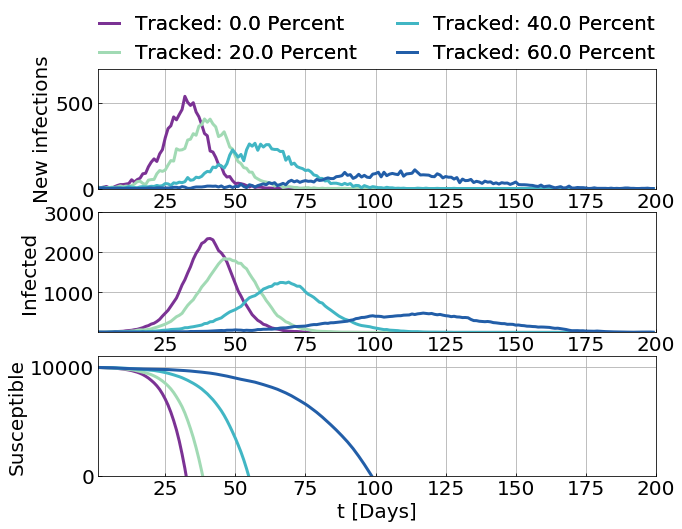

In [7]:
# Infections per time step
figure, (ax1, ax2, ax3) = plt.subplots(3, 1 ,figsize=(std_size, std_size * 6. / 8.))
colors = [
    '#7b3294',
    '#a1dab4',
    '#41b6c4',
    '#225ea8']
high_x = 200
#  New infections
for i, tracked_fraction in enumerate(tracking_fractions):
    ax1.plot(contagion.t, infections[i], color=colors[i],
            lw=lw, label='Tracked: %.1f Percent' %(tracked_fraction*100.))
ax1.set_xlim(1e0, high_x)
ax1.set_ylim(0., 700)
ax1.set_xscale('linear')
ax1.set_yscale('linear')
# ax1.set_xlabel(r't [Days]', fontsize=fontsize)
ax1.set_ylabel(r'New infections', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h,l, loc=9, bbox_to_anchor=(0.5, +1.6),
                 ncol=2, fontsize=fontsize, handlelength=h_length,
                 fancybox=True, frameon=False)
ax1.add_artist(lgd1)
ax1.grid(True)
# Infection total
for i, tracked_fraction in enumerate(tracking_fractions):
    ax2.plot(contagion.t, infectious[i], color=colors[i],
            lw=lw)
ax2.set_xlim(1e0, high_x)
ax2.set_ylim(1e0, 3000)
ax2.grid(True)
ax2.set_xscale('linear')
ax2.set_yscale('linear')
ax2.set_xlabel(r't [Days]', fontsize=fontsize)
ax2.set_ylabel(r'Infected', fontsize=fontsize)
ax2.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax2.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
# Healthy
for i, tracked_fraction in enumerate(tracking_fractions):
    ax3.plot(contagion.t,
             config['population size'] - np.cumsum(infectious[i]),
             lw=lw, color=colors[i],)
ax3.set_xlim(1., high_x)
ax3.set_ylim(0., 1.1e4)
ax3.set_xscale('linear')
ax3.set_yscale('linear')
ax3.set_xlabel(r't [Days]', fontsize=fontsize)
ax3.set_ylabel(r'Susceptible', fontsize=fontsize)
ax3.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax3.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax3.grid(True)
plt.show()

In [8]:
figure.savefig(PICS + "Contagion_Contact_Tracing.png",
               bbox_inches='tight')